# Open PV dataset-- November 13, 2017

 Open PV dataset, which includes publicly contributed data and data from Lawrence Berkeley National Lab's Tracking the Sun analysis.

Source: https://openpv.nrel.gov/search

https://emp.lbl.gov/publications/tracking-sun-ix-installed-price


Analysis by Perry Grossman

November 2017

I am investigating the Open PV dataset in order to try to understand trends in solar PV over time, by state, by incentives, and other possible factors.

I am also investigating this government data on renewables because I am concerned about threats to open data, given the removal of climate information from the EPA website. So I wanted to store some data locally.

Wes McKinney, Pandas creator, has stressed the importance of open data analysis to help curb abuses of government power:

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">For data people against abuses of gov&#39;t power:<br><br>1. Demand open data<br>2. Build open source analysis tools<br>3. Analyze data and report findings</p>&mdash; Wes McKinney (@wesmckinn) <a href="https://twitter.com/wesmckinn/status/823246631143350272">January 22, 2017</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

"Tracking the Sun is an annual report published by Lawrence Berkeley National Laboratory, dedicated to summarizing trends in the installed price of grid-connected, residential and non-residential solar photovoltaic (PV) systems in the United States. The most recent edition of the Tracking the Sun report, with additional details on the underlying data, can found here.

The full Tracking the Sun dataset (last updated August 17, 2016) is available for download and includes the full set of project-level data collected and cleaned for the most recent edition of the report. The download is accompanied by the User Guide, which contains descriptions of the data fields."

### Tracking the Sun Webinar Notes:
https://www.youtube.com/watch?v=dLoozyZrdJM&feature=youtu.be  
Residential and non- Residential systems (up to 5MW) (no utility-scale solar)   
Self-reported data.   
Transaction prices, not the same as the cost.  
Historical; rapid change in the industry  
2/3 of 3rd party systems have been scrubbed-- screened-- installed by larger installers.  
Integrated Third Party Owner (TPO) projects removed; System install, and financing means price complexity.  
-- Removed 221,000 cases
(It would be good to review these data later? Consider additional analyses)  
Non-integrated-- 1. installation contractor, 2. Finance provider.   
(an intermediate sale)-- reported to incentive programs  
(I have the full 800k record file; try to get the 450K system file)  



### Additional Data notes from LBNL Staff:
(1) To compare to Tracking the Sun, use the Tracking the Sun public data file
(which can be downloaded through OpenPV).

(2) Even with the item above, you won't be able to completely reproduce the summary statistics in Tracking the Sun, 
as there are several data providers that are scrubbed from the public data file.

Source: https://openpv.nrel.gov/search


In [1]:
#From Peter Bull Presentation ODSC May 2016
# install the watermark extension
#!pip install watermark
# once it is installed, you'll just need this in future notebooks:
%load_ext watermark

In [2]:
%watermark -a "Perry Grossman" -d -v -p numpy,pandas 

# -g 

Perry Grossman 2017-11-14 

CPython 3.5.2
IPython 4.1.2

numpy 1.10.4
pandas 0.18.0


In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# this allows plots to appear directly in the notebook
%matplotlib inline

In [4]:
import statistics as stats

http://nikgrozev.com/2015/06/16/fast-and-simple-sampling-in-pandas-when-loading-data-from-files/

parse dates: practical business python-- simple graphing
    sales=pd.read_csv(..data/"sample-salesv3.csv",parse_dates=['date'])

In [5]:
#data = pd.read_csv('openpv_tts_data.zip')

In [6]:
data = pd.read_csv('openpv_all.csv', sep=',',parse_dates=['date_installed'])

/home/perry/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2,5,8,10,12,13,14,15,16,20,23,25,26,27,28,32,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Using all the data

In [7]:
data.to_csv('data.csv',index=False, date_format='%Y%m%d')

## Use data.csv because it has already reduced the dataset.

In [8]:
#data = pd.read_csv('data.csv',parse_dates=['date_installed'])

In [9]:
# read data into a DataFrame, fixing data type issues
#data = pd.read_csv('openpv_all.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
###data = pd.read_csv('openpv_all.csv', sep=',') #  , error_bad_lines=False, index_col=False,dtype='unicode'
#takes a while, but works, with Pandas figuring out the data types.

In [10]:
data.head()

## need to do date for 'date_installed'

# http://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
#avoids the type warning--  but everything is an object.
#See also:
#https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

,state,date_installed,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,3rdparty
0,TX,2013-12-12,Austin Energy,uir,10.56,NaN,78702.0,residential,NaN,2.897777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TX,2014-07-11,Austin Energy,uir,12.72,NaN,78702.0,residential,NaN,3.144654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TX,2014-01-17,Austin Energy,uir,5.40,NaN,78702.0,residential,NaN,4.197330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TX,2012-09-27,Austin Energy,uir,7.50,NaN,78702.0,residential,NaN,3.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TX,2012-09-26,Austin Energy,uir,5.00,NaN,78702.0,residential,NaN,3.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.shape

(1020262, 81)

Even bigger than the roughly 880K they cite.  
Need to clean the data.  
When removing the 3rdparty NaN, will have less than their 450,000 projects, since they removed some private projects.

In [20]:
data.columns # how to show the full column list.


Index(['state', 'date_installed', 'incentive_prog_names', 'type', 'size_kw',
       'appraised', 'zipcode', 'install_type', 'installer', 'cost_per_watt',
       'cost', 'lbnl_tts_version_year', 'lbnl_tts', 'city', 'utility_clean',
       'tech_1', 'model1_clean', 'county', 'annual_PV_prod',
       'annual_insolation', 'rebate', 'sales_tax_cost', 'tilt1',
       'tracking_type', 'azimuth1', 'manuf2_clean', 'manuf3_clean',
       'manuf1_clean', 'inv_man_clean', 'reported_annual_energy_prod',
       'incentivetype', 'year_app_implied', 'year', 'npv_fit_real',
       'application_implied', 'npv_pbi_real', 'other_incentive',
       'appraised_cluster', 'inflation', 'other_incentive_real',
       'zip_available', 'cust_city', 'pbi', 'pbi_real', 'pbi_length',
       'application', 'fit_length', 'fit_rate', 'fit_payment',
       '_3rdparty_implied', 'utility', 'install_price_real_w', 'install_price',
       'installer_clean', 'manuf1_', 'inverter_reported', 'rebate_real',
       'model1', '_3

## Fix Zipcodes

Advice:

http://stackoverflow.com/questions/33137686/python-loading-zip-codes-into-a-dataframe-as-strings  
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

In [21]:
data['zipcode'] = data['zipcode'].astype(str).str.zfill(5)

## Need to Rename Variables Starting With Numbers

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

Using this advice:
    
#@ericmjl yes df.rename(columns = {'$b':'B'}, inplace = True)
#http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

In [22]:
data.rename(columns = {'3rdparty':'ThirdParty'}, inplace = True)

In [23]:
data.describe() # Last column is renamed

,size_kw,cost_per_watt,lbnl_tts_version_year,annual_PV_prod,annual_insolation,sales_tax_cost,tilt1,azimuth1,reported_annual_energy_prod,incentivetype,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,ThirdParty
count,1.020257e+06,762700.000000,797958.0,7.809690e+05,780969.000000,355309.000000,383365.000000,363281.000000,2.044290e+05,0.0,...,27106.0,0.0,0.0,1930.0,0.0,0.0,0.0,0.0,0.0,306993.0
mean,1.617434e+01,5.918867,2016.0,1.934038e+04,5.293618,2657.135224,22.472409,185.543216,2.001290e+04,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
std,8.818091e+02,2.068625,0.0,1.371303e+06,0.713343,14579.815550,8.007204,335.661910,1.864263e+05,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
min,2.000000e-03,0.000000,2016.0,8.660250e+00,1.177450,10.130237,0.010000,-76.000000,8.841482e-01,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
25%,3.708800e+00,4.600000,2016.0,5.617632e+03,4.627264,764.153153,18.000000,160.000000,5.569000e+03,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
50%,5.488000e+00,5.520000,2016.0,8.151460e+03,5.418356,1118.821468,22.000000,180.000000,8.250000e+03,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
75%,7.848000e+00,7.156235,2016.0,1.155491e+04,5.703623,1674.020650,26.000000,215.000000,1.190274e+04,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
max,7.373190e+05,30.000000,2016.0,1.113476e+09,6.761269,872902.116200,260.000000,200100.000000,3.500000e+07,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0


## Remove TPO Projects

Remove 221,006 projects

In [25]:
TPO_df = data[['ThirdParty']]  # ThirdParty
#TPO_df.tail(10)


In [26]:
TPO_df.head(10)

,ThirdParty
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [27]:
TPO_df.tail(10)

,ThirdParty
1020252,NaN
1020253,NaN
1020254,NaN
1020255,NaN
1020256,NaN
1020257,NaN
1020258,NaN
1020259,NaN
1020260,NaN
1020261,NaN


In [30]:
#energy_output_group = states_df.groupby('state') # For more review
#TPO_df_group = TPO_df.groupby('ThirdParty')
#TPO_df.size()
##TypeError: 'numpy.int32' object is not callable

In [31]:
TPO_df.describe()

,ThirdParty
count,306993.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [32]:
data.ThirdParty.isnull().sum()

713269

In [23]:
1020262-713269

306993

In [33]:
data = data[pd.notnull(data['ThirdParty'])]

In [34]:
data

,state,date_installed,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,ThirdParty
17,CA,2011-08-18,California Public Utilities Commission (Califo...,uir,2.5200,True,94014.0,residential,SolarCity,7.980000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18,CA,2013-01-25,California Public Utilities Commission (Califo...,uir,2.9400,NaN,94014.0,residential,Rec Solar,4.804422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
55,TX,2011-12-08,Oncor Electric Delivery Company,uir,7.9200,True,78681.0,residential,NaN,4.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
744,CA,2011-04-13,California Public Utilities Commission (Califo...,uir,5.6700,True,94022.0,residential,SolarCity,7.980000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
747,CA,2013-10-08,California Public Utilities Commission (Califo...,uir,4.6550,True,94024.0,residential,SolarCity,5.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
749,CA,2014-12-09,California Public Utilities Commission (Non-CS...,uir,2.1087,True,94545.0,residential,SolarCity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
750,CA,2014-12-16,California Public Utilities Commission (Non-CS...,uir,6.5016,True,94545.0,residential,SolarCity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
751,CA,2011-02-09,California Public Utilities Commission (Califo...,uir,4.2000,True,94549.0,residential,SolarCity,8.778000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3806,AZ,2012-08-13,Arizona Public Service,uir,3.9200,NaN,85373.0,residential,Rec Solar,4.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3807,AZ,2012-08-31,Arizona Public Service,uir,6.8670,NaN,85373.0,residential,Summerwind Solar,5.004806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [35]:
data.shape

(306993, 81)

In [36]:
data.to_csv('data_no_TPO.csv',index=False, date_format='%Y%m%d')

In [15]:
data.zipcode.isnull().sum() # We have all zip code data

5

In [17]:
#data.ThirdParty.isnull().sum() # But we lack most Third Party data
# now removed

In [18]:
data.rebate.describe()

count     386729.0
unique     55405.0
top         2000.0
freq        5025.0
Name: rebate, dtype: float64

In [19]:
#data.type() # Last column is renamed
data.dtypes

state                                  object
date_installed                 datetime64[ns]
incentive_prog_names                   object
type                                   object
size_kw                               float64
appraised                              object
zipcode                               float64
install_type                           object
installer                              object
cost_per_watt                         float64
cost                                   object
lbnl_tts_version_year                 float64
lbnl_tts                               object
city                                   object
utility_clean                          object
tech_1                                 object
model1_clean                           object
county                                 object
annual_PV_prod                        float64
annual_insolation                     float64
rebate                                 object
sales_tax_cost                    

Notes on converting to date format:

(Object, not indicated as a date.   
http://pandas.pydata.org/pandas-docs/stable/timeseries.html  
and here: 
http://chrisalbon.com/python/pandas_time_series_basics.html

we just need the date, not the time  

	
@PietroBattiston that means it's probably still a string, try converting first df['just_date'] = pd.to_datetime(df['just_date']) you may need to pass a format arg to to_datetime if it can't deduce the format – EdChum Jan 18 at 9:50


In [20]:
#Convert df['date'] from string to datetime
#data['date_installed'] = pd.to_datetime(data['date_installed']) #parsed above

In [21]:
#data.dtypes # looks better

In [22]:
data.describe() # Last column is renamed

,size_kw,zipcode,cost_per_watt,lbnl_tts_version_year,annual_PV_prod,annual_insolation,sales_tax_cost,tilt1,azimuth1,reported_annual_energy_prod,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,3rdparty
count,1.020257e+06,1.020257e+06,762700.000000,797958.0,7.809690e+05,780969.000000,355309.000000,383365.000000,363281.000000,2.044290e+05,...,27106.0,0.0,0.0,1930.0,0.0,0.0,0.0,0.0,0.0,306993.0
mean,1.617434e+01,7.195915e+04,5.918867,2016.0,1.934038e+04,5.293618,2657.135224,22.472409,185.543216,2.001290e+04,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
std,8.818091e+02,3.548879e+04,2.068625,0.0,1.371303e+06,0.713343,14579.815550,8.007204,335.661910,1.864263e+05,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
min,2.000000e-03,0.000000e+00,0.000000,2016.0,8.660250e+00,1.177450,10.130237,0.010000,-76.000000,8.841482e-01,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
25%,3.708800e+00,7.502300e+04,4.600000,2016.0,5.617632e+03,4.627264,764.153153,18.000000,160.000000,5.569000e+03,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
50%,5.488000e+00,9.202800e+04,5.520000,2016.0,8.151460e+03,5.418356,1118.821468,22.000000,180.000000,8.250000e+03,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
75%,7.848000e+00,9.372200e+04,7.156235,2016.0,1.155491e+04,5.703623,1674.020650,26.000000,215.000000,1.190274e+04,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
max,7.373190e+05,9.973700e+04,30.000000,2016.0,1.113476e+09,6.761269,872902.116200,260.000000,200100.000000,3.500000e+07,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0


In [23]:
# UPDATE DataFrame.sort is deprecated; use DataFrame.sort_values.

data_date = data.sort_values('date_installed')
data_date.head()



,state,date_installed,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,3rdparty
2727,IN,1909-07-07,NaN,uir,4.90,NaN,47401.0,Residential,Stumpner,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2728,IN,1909-07-07,NaN,uir,7.35,NaN,47401.0,Residential,Stumpner,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2729,IN,1909-07-07,NaN,uir,3.90,NaN,47408.0,Residential,Stumpner,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2733,IN,1909-07-07,NaN,uir,9000.00,NaN,46222.0,Commercial,JMS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402201,MA,1969-12-31,NaN,uir,1.80,NaN,2536.0,Residential,NaN,8.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 1909 dates look like outliers so let's remove them-- but not needed with reduced file.

In [24]:
#data_date[data_date['date_installed'] >'1909-07-07'].head()

But that just is for display. Need to remove them.

another way to get rid of year 1909  
http://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

In [25]:
#df = df[df.line_race != 0]
#data_date = data_date[data_date.date_installed != '1909-07-07']

In [26]:
#@vfxGer if there is a space in the column, like 'line race', then you can just do df = df[df['line race'] != 0]
#data_date = data_date[data_date['date_installed'] != '1909-07-07']

In [27]:
#data_date= data_date.drop([265, 266]) # not needed now

### Review States

In [28]:
data_date.state.value_counts().sort_values(inplace =True) # .sort_index()

In [29]:
data_date.state.isnull().sum() # no missing state data

0

In [30]:
# data_date.state  # Long list, not very informative

### Review Energy Production

In [34]:
data.reported_annual_energy_prod.isnull().sum() # lots of missing data for this: reported_annual_energy_prod

815833

In [35]:
data.reported_annual_energy_prod.mean() # Review more

20012.895748197432

### Review Annual Insolation

https://en.wikipedia.org/wiki/Direct_insolation

Direct insolation is measured in (W/m²) or kilowatt-hours per square meter per day (kW·h/(m²·day)).


1 kW·h/(m²·day) = 1,000 W · 1 hour / ( 1 m² · 24 hours) = 41.67 W/m²


In the case of photovoltaics, average direct insolation is commonly measured in terms of peak direct insolation as kWh/(kWp·y) (kilowatt hours per year per kilowatt peak rating)


In [36]:
data.annual_insolation.describe()

count    780969.000000
mean          5.293618
std           0.713343
min           1.177450
25%           4.627264
50%           5.418356
75%           5.703623
max           6.761269
Name: annual_insolation, dtype: float64

In [37]:
data_date.annual_insolation.isnull().sum() # lots of missing data for this: reported_annual_energy_prod

239293

In [55]:
data_date.annual_insolation.mean() 

5.1999676577660665

## Investigate the data

In [56]:
data_date.date_installed.describe() #slow # need to figure out how to get rid of the timestamp

#why does this give a key error sometimes-- when running it the second time?

count                  306993
unique                   2611
top       2015-05-28 00:00:00
freq                      894
first     2001-07-22 00:00:00
last      2015-12-31 00:00:00
Name: date_installed, dtype: object

In [57]:
data_date.incentive_prog_names.describe()

count                                                306993
unique                                                   26
top       California Public Utilities Commission (Non-CS...
freq                                                  74246
Name: incentive_prog_names, dtype: object

In [37]:
data.reported_annual_energy_prod.describe()

count    2.047900e+04
mean     2.094756e+04
std      1.841046e+05
min      7.740000e+00
25%      5.540530e+03
50%      8.240360e+03
75%      1.189922e+04
max      8.205000e+06
Name: reported_annual_energy_prod, dtype: float64

In [55]:
data_date.reported_annual_energy_prod.mean()

18056.470386859673

In [56]:
data_date.install_price.describe() # not too informative

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: install_price, dtype: float64

In [58]:
data.cost_per_watt.describe()

count    239542.000000
mean          5.075095
std           1.385436
min           0.750065
25%           4.471154
50%           5.010000
75%           5.600000
max          29.825243
Name: cost_per_watt, dtype: float64

In [59]:
#data_date.cost_per_watt.describe()
data_date.cost_per_watt.isnull().sum() 

67451

## Set date_installed as the index

In [58]:
data_date = data_date.set_index('date_installed') 
data_date.head()

,state,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,cost,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,ThirdParty
date_installed,,,,,,,,,,,,,,,,,,,,,
2001-07-22,TX,Oncor Electric Delivery Company,uir,6.450,NaN,76039.0,residential,NaN,8.380000,54051.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2005-09-11,CT,Connecticut Clean Energy Finance and Investmen...,uir,4.845,True,6512.0,residential,SolarCity,5.250000,25436.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2007-02-20,CA,California Public Utilities Commission (Califo...,uir,36.840,NaN,92354.0,government,Alpha Energy,8.407953,309749.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2007-02-28,CA,California Public Utilities Commission (Califo...,uir,5.200,NaN,92260.0,residential,See Systems,10.192308,53000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2007-03-01,CA,California Public Utilities Commission (Califo...,uir,8.910,NaN,92869.0,residential,Econo Air,9.314815,82995.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [59]:
#sorted(data.incentive_prog_names.unique()) TypeError: unorderable types: float() < str()
# http://stackoverflow.com/questions/10779187/what-does-the-unorderable-type-error-mean-in-python
data_date.incentive_prog_names.unique()

array(['Oncor Electric Delivery Company',
       'Connecticut Clean Energy Finance and Investment Authority',
       'California Public Utilities Commission (California Solar Initiative)',
       'New Jersey Board of Public Utilities (CORE & REIP Programs)',
       'California Energy Commission (New Solar Homes Partnership)',
       'Salt River Project', 'Arizona Public Service',
       'Sacramento Municipal Utility District',
       'Los Angeles Department of Water & Power',
       'New Jersey Board of Public Utilities (SREC Program)', 'NV Energy',
       'Massachusetts Clean Energy Center',
       'Massachusetts Department of Energy Resources',
       'City of Palo Alto Utilities', 'Maryland Energy Administration',
       'New York State Energy Research and Development Authority',
       'Entergy',
       'Pacific Power (California Center for Sustainable Energy)',
       'Texas New Mexico Power Company', 'Orlando Utilities Commission',
       'Texas North Company', 'Oregon Department

## Some Plots

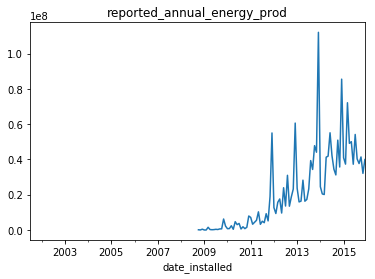

In [80]:

# Resample by month 
# using ‘start’ convention. Values are assigned to the last month of the period.
# s.resample('M', convention='start').asfreq().head()
date_installed_plot = data_date.reported_annual_energy_prod.resample('M', convention='end').sum().plot(title="reported_annual_energy_prod")



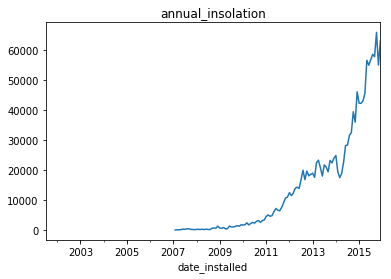

In [82]:
# annual_insolation
# Resample by month 
# using ‘start’ convention. Values are assigned to the last month of the period.
# s.resample('M', convention='start').asfreq().head()
date_installed_plot = data_date.annual_insolation.resample('M', convention='end').sum().plot(title="annual_insolation",legend=None)



In [83]:
# ? Insoluation going up??

###### Using some chart styles from Peter Bull (Driven Data) data science tutorial
(ODSC East 2016)


Plot insolation-- 
http://seaborn.pydata.org/generated/seaborn.kdeplot.html

C:\Users\perry67\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\perry67\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


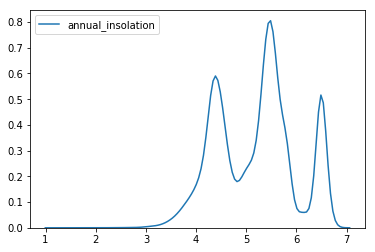

In [62]:
plot_data = data_date['annual_insolation'] #KeyError: 'date_installed'
plot_data = plot_data[plot_data != 0]
sns.kdeplot(plot_data, bw=0.1)
plt.show()

In [65]:

# units of insolation?

# meaning of this? what is the bottom? in thousands-- cases?

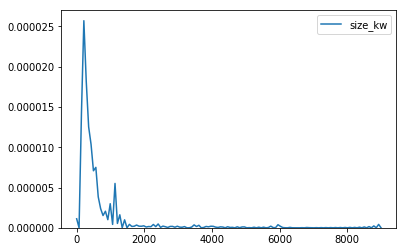

In [66]:
plot_data = data_date['size_kw']
plot_data = plot_data[plot_data != 0]
sns.kdeplot(plot_data, bw=0.1)
plt.show()

## Paste for 'amount_tsh' and plot
## Paste for 'latitude' and plot

#### Rescale the above chart--- trim excess data

In [67]:
# From Peter Bull
def kde_plot(dataframe, variable, upper=0.0, lower=0.0, bw=0.1):
    plot_data = dataframe[variable]
    plot_data = plot_data[(plot_data > lower) & (plot_data < upper)]
    sns.kdeplot(plot_data, bw=bw)
    plt.show()

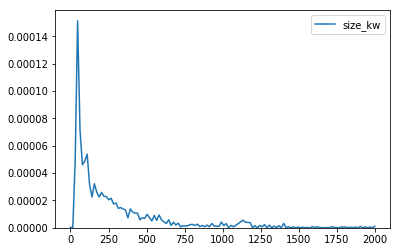

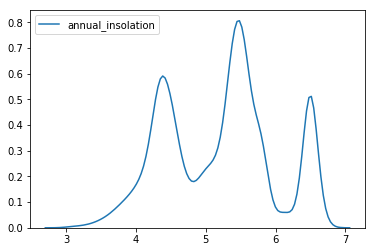

In [70]:
kde_plot(data_date, 'size_kw', upper=2000)
kde_plot(data_date, 'annual_insolation', lower =3, upper=30) #seems to need upper indicated, but not lower.

#### Simple Graphing

(insights from Practical Business Python)

In [38]:
states_df = data_date[['state','size_kw',]]  # 'size_kw' #reported_annual_energy_prod
states_df.tail(10)

,state,size_kw
814,IN,5.22
1020238,PA,194.56
799,AL,3000.00
815,TX,1111.59
817,TX,8.48
491,IN,NaN
283078,OH,NaN
283095,PA,NaN
283266,OH,NaN
283285,PA,NaN


In [40]:
energy_output_group = states_df.groupby('state') # For more review
energy_output_group.size()

state
AK         22
AL         32
AR        239
AZ      89360
CA     626815
CO       2603
CT      23643
DC       3296
DE       5116
FL       2984
GA         53
HI       2324
IA        206
ID         43
IL       1480
IN        764
KS         28
KY         31
LA        345
MA      71421
MD      11401
MD          2
ME        702
MI        263
MN       1570
MO       5504
MS         71
MT         61
NC         75
ND          3
NE         17
NH       3501
NJ      51045
NM       8356
NV      16048
NY      50988
OH       2245
OH          5
OK         10
OR       4280
PA      11373
PA          2
PR          4
RI        583
SC        132
SD         16
TN        601
TX      14315
UT        815
VA         50
VT       1642
WA        207
WI       3321
WV         92
WY        157
dtype: int64

In [41]:
reported_annual_energy_prod_totals = energy_output_group.sum()
reported_annual_energy_prod_totals.sort_values(by=['size_kw'],ascending = False).head(5) #size_kw

,size_kw
state,
CA,7.378772e+06
NJ,2.283687e+06
MA,1.941268e+06
AZ,1.647163e+06
NY,5.750475e+05


#### Will need to go back and review the LBNL presentation, and how they cleaned the data.  
They mentioned CA missing data.


### State and Size in Kilowatts




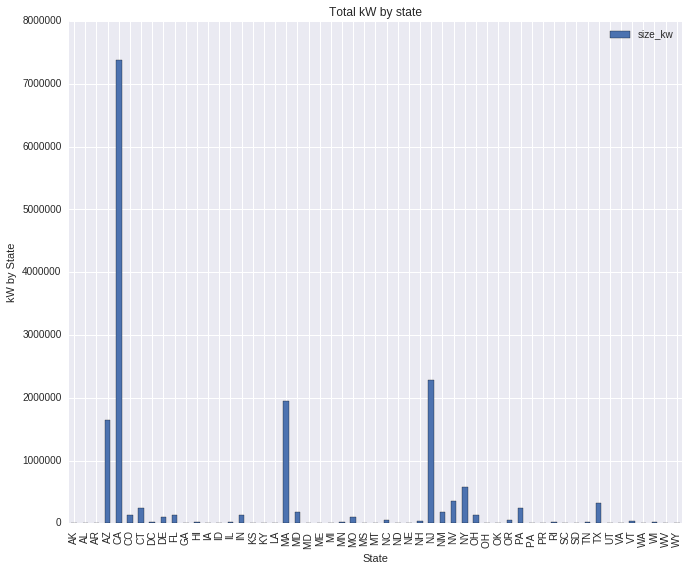

In [42]:
my_energy_plot = reported_annual_energy_prod_totals.plot(kind='bar',title="Total kW by state",figsize=(11, 9))
my_energy_plot.set_xlabel("State")


my_energy_plot.set_ylabel("kW by State")

In [44]:
# use this code for other variables


#my_energy_plot = reported_annual_energy_prod_totals.plot(kind='bar',title="Size kW by State",figsize=(11, 9))
#my_energy_plot.set_xlabel("State")
#my_energy_plot.set_ylabel("Size in kW totals by state")

## Back to the Main data_date file.

Below we display the relationship between insolation and reported energy production.


From Wikipedia:
"Insolation is the power received on Earth per unit area on a horizontal surface.[3] It depends on the height of the Sun above the horizon.[1]"  
https://en.wikipedia.org/wiki/Solar_irradiance

We should expect energy production to increase with insolation and it does.

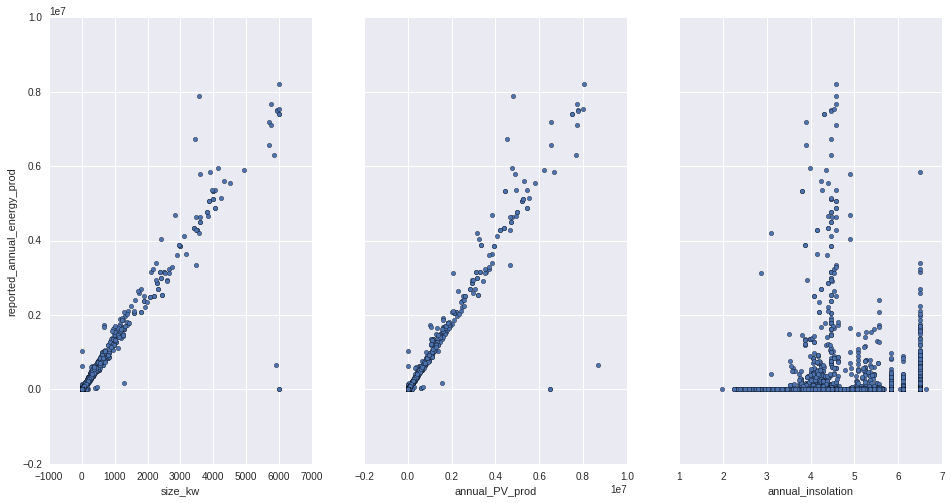

In [74]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1,3, sharey=True) # (1, 3, sharey=True)
data_date.plot(kind='scatter', x='size_kw', y='reported_annual_energy_prod', ax=axs[0], figsize=(16, 8))
data_date.plot(kind='scatter', x='annual_PV_prod', y='reported_annual_energy_prod', ax=axs[1])
data_date.plot(kind='scatter', x='annual_insolation', y='reported_annual_energy_prod', ax=axs[2])

# then, plot the least squares line
#plt.plot(data, preds, c='red', linewidth=2)

Some more data cleaning is needed.
For now I will drop energy production with low values, though we may want to investigate this more and possibly impute some data.

1. Drop NaNs; also remove some of the lower scores
2. Impute NaNs
3. Review how they cleaned the data

#### Redo with without null reported annual energy production data

In [75]:
data_date2 = data_date[data_date.reported_annual_energy_prod.notnull()]

In [76]:
data_date2 = data_date[data_date.reported_annual_energy_prod > 2000]


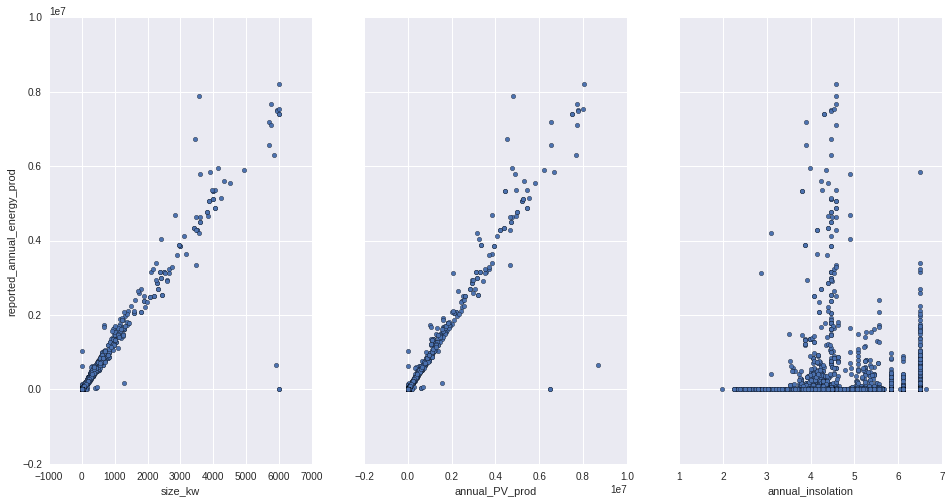

In [77]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1,3, sharey=True) # (1, 3, sharey=True)
data_date2.plot(kind='scatter', x='size_kw', y='reported_annual_energy_prod', ax=axs[0], figsize=(16, 8))
data_date2.plot(kind='scatter', x='annual_PV_prod', y='reported_annual_energy_prod', ax=axs[1])
data_date2.plot(kind='scatter', x='annual_insolation', y='reported_annual_energy_prod', ax=axs[2])

# then, plot the least squares line
#plt.plot(data, preds, c='red', linewidth=2)

### Now Import Machine Learning Tools from sklearn

In [78]:
from sklearn.svm          import SVC                    as support_vector_classifier
from sklearn.ensemble     import RandomForestClassifier as random_forest_classifier
from sklearn.neighbors    import KNeighborsClassifier   as knn_classifier
from sklearn.linear_model import LinearRegression       as linear_regression_classifier
# making them look like function calls. -- can make it easier for some people
#-- ie. for those not geared to OO?
# object oriented projects
#- - 
# -- interpreted and dynamically typed
from sklearn.cross_validation import train_test_split

In [79]:
train, test = train_test_split(data_date2, train_size=0.80, random_state=123) #see random number generator
train = train.copy()
test  = test.copy() # copy-- operations on these-- views of the same dataset

#testing 20% of the dataset

In [80]:
#y  reported_annual_energy_prod

model = linear_regression_classifier()  #call it
model.fit(train['size_kw'.split()],#inputs
          train['reported_annual_energy_prod'].values.ravel()) #outputs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
model.score(test['size_kw'.split()],
#            test['mpg'].astype(int).values.ravel()) # for discrete predictions
            test['reported_annual_energy_prod'].values.ravel())              # for continuous predictions


0.98521201552557558

Good, strong score.  
Now try to bring other elements into the model.  
-- annual_insolation  
-- cost_per_watt
-- Location? (Create dummy variables, or run it separately)  

Like Dataglen (dataglen.com), try to figure out why energy production is greater in some places versus others.
But using higher level data.


In [81]:
predictions = model.predict(test['size_kw'.split()])
predictions
#check the data-- looks good
#floating point-- how much accuracy needed?

array([  13575.52232958,    7479.77158969,   11030.79767541, ...,
         12393.02946055,   60283.99065663,  344105.92908343])

Too big, so it is just showing some of the array-- for predicted energy output.

In [82]:
test['reported_annual_energy_prod']
# lists the predicted 'reported_annual_energy_prod' by the index (date)

date_installed
2015-03-05     16500.000
2015-04-22      5483.000
2012-11-21     12949.200
2015-05-05      2451.120
2014-10-03      6400.000
2014-02-13     13612.500
2012-03-09     13959.000
2015-01-08     15750.000
2015-04-06      7594.740
2014-12-19      8581.680
2015-01-06      8240.360
2015-02-06     23200.650
2015-04-30     11538.000
2015-01-14      5869.200
2015-07-06      2293.000
2014-04-29      6614.590
2012-04-13      7095.000
2014-08-29      6206.000
2012-08-02      8269.000
2013-12-30      8250.000
2014-10-17      4387.020
2015-03-27     14000.000
2015-05-05      7786.440
2011-07-27      6831.000
2014-12-17     39550.500
2013-11-08      5255.250
2015-01-16     14086.080
2014-01-24     14850.000
2015-01-16      5775.000
2015-09-29      6516.000
                 ...    
2012-10-09      4857.000
2015-06-15      5906.000
2010-09-10     10347.000
2014-11-06      2736.000
2015-09-14     13529.000
2014-05-14      9900.000
2015-10-26      7312.580
2014-06-20     11979.000
2015-03-06

### Next run it with Annual Insolation and Cost Per Watt
But need to clean those features first, given missing data

Do that later

In [83]:
#y  reported_annual_energy_prod

#model2 = linear_regression_classifier()  #call it
#model2.fit(train['size_kw annual_insolation cost_per_watt'.split()],#inputs
 #         train['reported_annual_energy_prod'].values.ravel()) #outputs

In [84]:
#model2.score(test['size_kw annual_insolation cost_per_watt'.split()],
#            test['mpg'].astype(int).values.ravel()) # for discrete predictions
#            test['reported_annual_energy_prod'].values.ravel())              # for continuous predictions
# was 0.98521201552557558 with just size-kw

In [ ]:
#predictions2 = model2.predict(test['annual_insolation cost_per_watt'.split()])
#predictions2
#check the data-- looks good
#floating point-- how much accuracy needed?

In [94]:
#test2['reported_annual_energy_prod']
# lists the predicted 'reported_annual_energy_prod' by the index (date)

## Run Comparisons in Different Areas

### CA

#### Create a new df? Best way?

In [85]:
#using df = df[df.name != 'Tina']
#df

#using data_date2, which is date indexed, cut 1909, and >2000 energy output, and size_kw != ?

data_date2_CA = data_date2[data_date2.state == 'CA']
data_date2_CA

,state,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,cost,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,ThirdParty
date_installed,,,,,,,,,,,,,,,,,,,,,
2009-01-09,CA,Sacramento Municipal Utility District,uir,16.200,NaN,95624.0,residential,Sierra Pacific Home & Comfort,7.250988,117466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2009-02-10,CA,Sacramento Municipal Utility District,uir,2.520,True,95818.0,residential,SolarCity,NaN,n/a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2009-03-11,CA,Sacramento Municipal Utility District,uir,710.880,NaN,95828.0,unknown,Siemens Building Technologies,8.303664,5902909.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2009-03-11,CA,Sacramento Municipal Utility District,uir,448.000,NaN,95828.0,unknown,Siemens Building Technologies,7.529018,3373000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2009-06-30,CA,Sacramento Municipal Utility District,uir,2.730,NaN,95757.0,residential,Future Energy Corp,8.791209,24000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2009-08-07,CA,Sacramento Municipal Utility District,uir,5.760,NaN,95747.0,residential,Es Electrical Construction,8.664931,49910.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2009-09-14,CA,Sacramento Municipal Utility District,uir,4.500,True,95621.0,residential,SolarCity,NaN,n/a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2009-09-23,CA,Sacramento Municipal Utility District,uir,205.950,NaN,95815.0,unknown,Sunedison,5.049769,1040000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2009-11-05,CA,Sacramento Municipal Utility District,uir,3609.600,NaN,95742.0,unknown,Solar Power,NaN,n/a,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0


In [86]:
data_date2_CA.shape

(14339, 80)

can you use the general test? or do you need  a new train for ca?  

Think I can still use the same variables-- train, test-- just need to keep track

In [87]:
train, test = train_test_split(data_date2_CA, train_size=0.80, random_state=123) #see random number generator
train = train.copy()
test  = test.copy() # copy-- operations on these-- views of the same dataset

#testing 20% of the dataset#

In [88]:
#y  reported_annual_energy_prod

model = linear_regression_classifier()  #call it
model.fit(train['size_kw'.split()],#inputs
          train['reported_annual_energy_prod'].values.ravel()) #outputs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
model.score(test['size_kw'.split()],
#            test['mpg'].astype(int).values.ravel()) # for discrete predictions
            test['reported_annual_energy_prod'].values.ravel())              # for continuous predictions

#http://scikit-learn.org/stable/modules/model_evaluation.html

0.98573094075697953

Higher result for CA 0.97 vs 0.96 for the full data_date2 dataset

In [90]:
predictions = model.predict(test['size_kw'.split()])
predictions
#check the data-- looks good
#floating point-- how much accuracy needed?

array([  2871.73569832,   9825.06583109,  18837.20320989, ...,
        13864.98948366,   5225.76813433,   7199.11545693])

In [91]:
test['reported_annual_energy_prod']
# lists the predicted 'reported_annual_energy_prod' by the index (date)

date_installed
2014-11-21     3988.0
2015-11-04     7456.0
2013-10-31    19175.0
2015-09-17     2537.0
2014-11-12     9468.0
2014-08-12    12519.0
2012-07-26     7837.0
2015-04-25     5749.0
2015-09-29     6560.0
2011-02-23     4342.0
2012-05-24     6176.0
2015-03-25     7304.0
2014-08-20     8517.0
2013-04-19     7137.0
2015-04-06     7300.0
2013-12-17     6355.0
2014-04-09     6352.0
2014-10-07    11756.0
2015-05-04     9998.0
2014-12-30     4071.0
2015-09-30     8712.0
2014-05-06    12926.0
2011-12-16    12829.0
2015-06-30     7183.0
2015-01-27     7108.0
2012-08-06     8707.0
2015-11-25     9871.0
2013-09-24    14878.0
2014-02-27     4926.0
2014-01-31     2610.0
               ...   
2013-06-07     9329.0
2013-07-02     7962.0
2014-05-12     2628.0
2012-11-21     8894.0
2015-01-23     3009.0
2014-09-23     3910.0
2013-11-25    13155.0
2013-12-31     6323.0
2012-07-05    15188.0
2015-09-08     4331.0
2013-09-30    10087.0
2015-06-04     2860.0
2013-04-05     6749.0
2014-12-19     70

Now on to Massachusetts

### MA

In [92]:
#using df = df[df.name != 'Tina']
#df

#using data_date2, which is date indexed, cut 1909, and >2000 energy output, and size_kw != ?

data_date2_MA = data_date2[data_date2.state == 'MA']
data_date2_MA

,state,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,cost,...,new_constr,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,ThirdParty
date_installed,,,,,,,,,,,,,,,,,,,,,
2010-07-19,MA,Massachusetts Clean Energy Center,uir,99.220,NaN,2035.0,commercial,Constellation Energy,6.323221,627390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-07-19,MA,Massachusetts Department of Energy Resources,uir,85.690,NaN,2035.0,commercial,Hegarty & Sons Electrical,6.341767,543426.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-07-19,MA,Massachusetts Department of Energy Resources,uir,99.220,NaN,2035.0,commercial,Hegarty & Sons Electrical,6.323221,627390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-07-19,MA,Massachusetts Clean Energy Center,uir,85.690,NaN,2035.0,commercial,Constellation Energy,6.341767,543426.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-07-19,MA,Massachusetts Department of Energy Resources,uir,54.120,NaN,2035.0,commercial,Hegarty & Sons Electrical,6.593662,356849.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-07-19,MA,Massachusetts Department of Energy Resources,uir,99.220,NaN,2035.0,commercial,Hegarty & Sons Electrical,6.323221,627390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-07-19,MA,Massachusetts Department of Energy Resources,uir,58.630,NaN,2035.0,commercial,Hegarty & Sons Electrical,6.541071,383503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-07-19,MA,Massachusetts Department of Energy Resources,uir,108.240,NaN,2035.0,commercial,Hegarty & Sons Electrical,6.288793,680699.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-07-19,MA,Massachusetts Clean Energy Center,uir,108.240,NaN,2035.0,commercial,Constellation Energy,6.288793,680699.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [93]:
data_date2_MA.shape # bigger dataset than CA

(22499, 80)

In [94]:
train, test = train_test_split(data_date2_MA, train_size=0.80, random_state=123) #see random number generator
train = train.copy()
test  = test.copy() # copy-- operations on these-- views of the same dataset

#testing 20% of the dataset#

In [95]:
#y  reported_annual_energy_prod

model = linear_regression_classifier()  #call it
model.fit(train['size_kw'.split()],#inputs
          train['reported_annual_energy_prod'].values.ravel()) #outputs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
model.score(test['size_kw'.split()],
#            test['mpg'].astype(int).values.ravel()) # for discrete predictions
            test['reported_annual_energy_prod'].values.ravel())              # for continuous predictions

#http://scikit-learn.org/stable/modules/model_evaluation.html

0.88124059345918759

Much stronger correlation for MA

Wonder why that would be 

Would expect less. Insolation should be less.

Need to clean those data and review.

In [266]:
predictions = model.predict(test['size_kw'.split()])
predictions
#check the data-- looks good
#floating point-- how much accuracy needed?

array([ -1.20601203e+02,   1.70488599e+03,   5.86927863e+03,
         2.38944368e+03,   8.70258687e+03,   6.04041806e+03,
         1.11540575e+03,   4.74736463e+03,   3.97406798e+03,
         2.95990843e+03,   1.89504090e+03,   4.89948856e+03,
         3.22612531e+03,   9.10191220e+03,   1.89504090e+03,
         5.71081620e+03,   1.46100662e+04,   5.50798429e+03,
         4.72201064e+03,   7.80885877e+03,   1.23535612e+04,
         7.48559541e+03,   1.10858618e+04,   3.94564941e+05,
         4.87894527e+02,   1.20261690e+02,   5.05161250e+03,
         6.69962176e+03,   2.84581548e+03,   4.28465434e+03,
         4.57622521e+03,   7.09007319e+03,   3.04230889e+03,
         8.13212213e+03,   4.89948856e+03,   7.70110432e+03,
         9.00683474e+03,   7.09007319e+03,   6.18851136e+04,
         5.20373643e+03,   1.16436496e+04,   2.95990843e+03,
         8.29692305e+03,   3.28317178e+03,   2.46550565e+03,
         3.22612531e+03,   4.89948856e+03,   3.92969850e+03,
         6.96583865e+03,

In [267]:
test['reported_annual_energy_prod']
# lists the predicted 'reported_annual_energy_prod' by the index (date)

date_installed
2008-06-30      2670.0000
2013-08-09      3975.7000
2015-02-12      2905.3200
2012-08-13      4961.0000
2013-05-03      9549.9800
2015-07-03      8283.6800
2015-08-07      3600.0000
2014-05-13      6654.3000
2014-10-10      6024.3750
2014-10-17      4387.0200
2014-01-17      3410.7600
2015-01-08      5072.8350
2013-03-21      5784.0000
2015-05-05      9709.6800
2014-06-11      4750.0000
2015-07-27      5272.4600
2015-09-22     15912.3200
2015-03-09      7920.0000
2014-11-12      5961.5200
2015-07-10      9677.4800
2014-01-31     14166.0000
2013-09-03      8205.1992
2014-02-11      9717.5000
2014-05-27    425820.2000
2013-03-04      2464.1000
2012-07-16      2437.6000
2013-04-26      5920.0000
2015-09-24      7940.4300
2013-02-15      3680.8000
2013-09-23      6314.0000
                 ...     
2014-09-23      8396.6400
2015-09-18     11120.3750
2015-10-06      2730.2800
2015-04-16     46080.0000
2015-04-28     12054.1900
2010-07-30     51290.0000
2015-01-05      6245.60

In [271]:
#test['reported_annual_energy_prod']
delta          = predictions - test.reported_annual_energy_prod
test['reported_annual_energy_prod_lr'] = predictions
test['lr']     = delta
test[delta.abs() > 5000] #where delta greater than x


,state,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,cost,...,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,ThirdParty,reported_annual_energy_prod_lr,lr
date_installed,,,,,,,,,,,,,,,,,,,,,
2014-05-27,MA,Massachusetts Clean Energy Center,uir,313.500,NaN,01840,government,Waterline Alternative Energies,4.073547,1277057.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.945649e+05,-31255.258763
2008-11-01,MA,Massachusetts Clean Energy Center,uir,67.380,NaN,01840,commercial,Nexgen Energy Solutions,6.969858,469629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.255876e+04,11670.756021
2013-02-06,MA,Massachusetts Clean Energy Center,uir,279.500,NaN,01532,commercial,Dynamic Solar,4.931367,1378317.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.514632e+05,26707.160409
2014-05-30,MA,Massachusetts Department of Energy Resources,uir,5982.600,NaN,01083,unknown,Borrego Solar,2.423695,14500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.581280e+06,73709.814506
2014-06-06,MA,Massachusetts Department of Energy Resources,uir,445.170,NaN,02539,unknown,American Capital Energy,NaN,n/a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.614829e+05,5465.595990
2012-07-25,MA,Massachusetts Department of Energy Resources,uir,23.000,NaN,01532,residential,RGS/Real Goods,7.074130,162705.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.629826e+04,8078.255046
2012-04-27,MA,Massachusetts Clean Energy Center,uir,103.400,NaN,02767,commercial,Munro Electric Co,4.323017,447000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.282213e+05,18233.289709
2015-06-03,MA,Massachusetts Clean Energy Center,uir,5.520,NaN,01562,residential,Next Step Living,7.655960,42260.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.138869e+03,-6826.131097
2014-06-30,MA,Massachusetts Department of Energy Resources,uir,5998.740,NaN,01011,commercial,"IESI, Inc",2.500525,15000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.601740e+06,201740.483405


### Random Forest Classifier

In [273]:
model = random_forest_classifier(n_estimators=100) #default is 10
model.fit(train['reported_annual_energy_prod'.split()],
          train['size_kw'].astype(int).values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [274]:
model.score(test['reported_annual_energy_prod'.split()],
            test['size_kw'].astype(int).values.ravel()) # for discrete predictions #newvector-- integer version
#            test['mpg'].values.ravel())              # for continuous predictions

#why different
#

0.31367628607277293

Score is much lower than the regression scores.

Need to review that to understand why.

Also, need to run this for CA and MA.

##### Next we would compare the regression and random forest scores.
To do that later.

In [99]:
''''#test['reported_annual_energy_prod']
delta          = predictions - test.reported_annual_energy_prod
test['reported_annual_energy_prod_lr'] = predictions
test['lr']     = delta
test[delta.abs() > 5000] #where delta greater than x
# reported_annual_energy_prod_lr-- is linear regression
# lr is delta
'''

"'#test['reported_annual_energy_prod']\ndelta          = predictions - test.reported_annual_energy_prod\ntest['reported_annual_energy_prod_lr'] = predictions\ntest['lr']     = delta\ntest[delta.abs() > 5000] #where delta greater than x\n# reported_annual_energy_prod_lr-- is linear regression\n# lr is delta\n"

Now turn to analysis of system size in kilowatts

## Analysis of size_kw

In [97]:
#create a new df
data_date3 = data_date[data_date.size_kw.notnull()]

In [98]:
# edit to remove the 0s
#df = df[df.line_race != 0]
data_date3 = data_date3[data_date3.size_kw > 100]

In [99]:
# edit to remove the 0s
#df = df[df.line_race != 0]
data_date3 = data_date3[data_date3.cost_per_watt > 1]

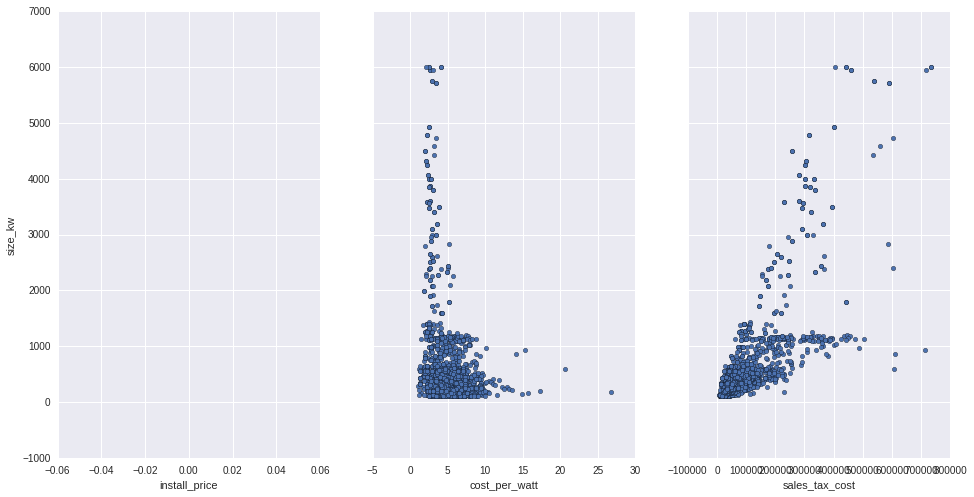

In [100]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data_date3.plot(kind='scatter', x='install_price', y='size_kw', ax=axs[0], figsize=(16, 8))
data_date3.plot(kind='scatter', x='cost_per_watt', y='size_kw', ax=axs[1])
data_date3.plot(kind='scatter', x='sales_tax_cost', y='size_kw', ax=axs[2])

# then, plot the least squares line
#plt.plot(data, preds, c='red', linewidth=2)

##### Findings:  
1. Install price not showing. Need to review those data.
2. Size (kw) does not seem to be associated with cost per watt. But some data cleaning is probably needed.
3. Size (kw) increases with Sales Tax Cost, but in a decreasing manner.

##### Data notes
1. Review Install price data-- convert format?
2. Remove zero kw projects.
3. Reverse analysis for sales tax cost to have that be the dependent variable.

Several variables have missing data, including: 

effic_1,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_rea

In [100]:
#data.describe(where count=0.0)
# Investigate later

Get a count by state

Sort by values in descending order

In [104]:
#data.state.value_counts(by= 'val').sort_index()
data_date2.state.sort_values
#df2.sort_values(by='val').sort_index(kind='mergesort')
#http://stackoverflow.com/questions/33699555/pandas-sorting-by-value-and-then-by-index

<bound method Series.sort_values of date_installed
2001-04-30    CA
2002-10-02    AZ
2002-10-02    AZ
2002-10-09    AZ
2002-11-15    AZ
2003-02-19    PA
2003-04-17    MA
2003-04-29    AZ
2003-05-14    WI
2003-08-05    MA
2003-08-12    NY
2003-08-13    NY
2003-08-21    PA
2003-09-02    AZ
2003-09-11    MA
2003-10-03    NY
2003-10-17    AZ
2004-01-06    NY
2004-01-09    AZ
2004-01-30    AZ
2004-02-06    AZ
2004-02-25    AZ
2004-02-26    MA
2004-03-11    AZ
2004-04-20    MA
2004-05-07    AZ
2004-05-27    MA
2004-06-29    MA
2004-06-30    AZ
2004-07-01    AZ
              ..
2015-12-30    CT
2015-12-30    NY
2015-12-30    NY
2015-12-30    CA
2015-12-30    CT
2015-12-30    NY
2015-12-30    CT
2015-12-30    TX
2015-12-31    AZ
2015-12-31    CA
2015-12-31    CA
2015-12-31    NY
2015-12-31    CT
2015-12-31    AZ
2015-12-31    CT
2015-12-31    AZ
2015-12-31    AZ
2015-12-31    AZ
2015-12-31    AZ
2015-12-31    AZ
2015-12-31    CT
2015-12-31    AZ
2015-12-31    AZ
2015-12-31    CA
2015-12-31    

In [105]:
data_date.sales_tax_cost.describe()

count     35591.000000
mean       2657.559913
std       14995.992867
min          28.996301
25%         768.677070
50%        1118.710653
75%        1676.209939
max      799768.770000
Name: sales_tax_cost, dtype: float64

In [110]:
#print repr(reddf.index) 
print(data_date.sales_tax_cost)

date_installed
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1995-03-03   NaN
1995-09-01   NaN
1996-09-15   NaN
1996-11-18   NaN
1997-07-12   NaN
1997-08-04   NaN
1997-10-12   NaN
1997-10-13   NaN
1997-10-13   NaN
1997-10-13   NaN
1997-10-13   NaN
              ..
2016-06-07   NaN
2016-06-20   NaN
2016-07-06   NaN
2016-07-21   NaN
2016-08-02   NaN
2016-08-08   NaN
2016-08-11   NaN
2016-09-08   NaN
2016-09-12   NaN
2016-09-22   NaN
2016-09-23   NaN
2016-09-23   NaN
2016-09-23   NaN
2016-09-28   NaN
2016-09-28   NaN
2016-10-07   NaN
2016-10-17   NaN
2016-10-18   NaN
2016-10-26   NaN
2016-11-09   NaN
2016-11-14   NaN
2016-11-18   NaN
2016-11-29   NaN
2016-12-01   NaN
2016-12-02   NaN
2016-12-02   NaN
2016-12-08   NaN

In [ ]:
data.sales_tax_cost.value_counts().sort_index()

In [112]:
#data_date.sales_tax_cost.value_counts().sort_index()
# bin these

In [ ]:
Index(['state', 'date_installed', 'incentive_prog_names', 'type', 'size_kw',
       'appraised', 'zipcode', 'install_type', 'installer', 'cost_per_watt',
       'cost', 'lbnl_tts_version_year', 'lbnl_tts', 'city', 'utility_clean',
       'tech_1', 'model1_clean', 'county', 'annual_PV_prod',
       'annual_insolation', 'rebate', 'sales_tax_cost', 'tilt1',
       'tracking_type', 'azimuth1', 'manuf2_clean', 'manuf3_clean',
       'manuf1_clean', 'inv_man_clean', 'reported_annual_energy_prod',
       'incentivetype', 'year_app_implied', 'year', 'npv_fit_real',
       'application_implied', 'npv_pbi_real', 'other_incentive',
       'appraised_cluster', 'inflation', 'other_incentive_real',
       'zip_available', 'cust_city', 'pbi', 'pbi_real', 'pbi_length',
       'application', 'fit_length', 'fit_rate', 'fit_payment',
       '_3rdparty_implied', 'utility', 'install_price_real_w', 'install_price',
       'installer_clean', 'manuf1_', 'inverter_reported', 'rebate_real',
       'model1', '_3rdparty', 'inv_model_reported', 'microinv_solarhub',
       'bipv_3', 'bipv_2', 'bipv_1', 'sales_tax_rate', 'sales_tax_cost_real',
       'bipv_all', 'thinfilm_all', 'china', 'sys_sizeac', 'pbi_rate',
       'new_constr', 'effic_1', 'cust_county', 'tracking', 'inv_model_clean',
       'mod_cost_real', 'inv_cost_real', 'bos_powerclerk_real',
       'permitting_real', '3rdparty'],
      dtype='object')

In [53]:
data.date_installed.value_counts().sort_index()

01/01/1998       2
01/01/1999       6
01/01/2000      22
01/01/2001      10
01/01/2002      10
01/01/2003       5
01/01/2004      24
01/01/2005      39
01/01/2006      35
01/01/2007      65
01/01/2008     150
01/01/2009     290
01/01/2010      25
01/01/2011      35
01/01/2012      69
01/01/2013      15
01/01/2014      13
01/01/2015      91
01/01/2016       3
01/02/1999       1
01/02/2002      18
01/02/2003       8
01/02/2004       1
01/02/2005       1
01/02/2006      10
01/02/2007      10
01/02/2008      50
01/02/2009     148
01/02/2010       4
01/02/2011       7
              ... 
12/30/2004      88
12/30/2005      59
12/30/2006      14
12/30/2007      16
12/30/2008     145
12/30/2009     373
12/30/2010     504
12/30/2011     492
12/30/2012      19
12/30/2013     654
12/30/2014    1127
12/30/2015    1065
12/30/2016       2
12/31/1969     119
12/31/1999       2
12/31/2001      35
12/31/2002      17
12/31/2003      15
12/31/2004      47
12/31/2005      12
12/31/2006      23
12/31/2007  

In [54]:
data.incentive_prog_names.value_counts().sort_index()

Ajo Improvement Company                                                            3
Ameren                                                                          3650
Arizona Public Service                                                         40647
Arkansas State Energy Office                                                      98
Austin Energy                                                                   4688
Bear Valley Electric (California Center for Sustainable Energy)                   78
CPS Energy                                                                      3284
California Energy Commission (Emerging Renewables Program)                     27952
California Energy Commission (New Solar Homes Partnership)                     17286
California Public Utilities Commission (California Solar Initiative)          148988
California Public Utilities Commission (Non-CSI Net Metered Systems)          260940
California Public Utilities Commission (Self-Generation Incentive

#### Investigate Third Party-- tho this is likely of Less Importance

In [79]:
thirdparty = data['ThirdParty']
type(thirdparty)

pandas.core.series.Series

In [119]:
#print(thirdparty)

In [117]:
#thirdparty[999000:]

In [81]:
thirdparty2 = data.ThirdParty # why not working here? number issue?  or pandas/python version issue?
# 

#### Investigate Rebates

In [25]:
# select a column in a df

In [120]:
#data.rebate

In [121]:
#data.rebate.convert_objects(convert_numeric=True)
pd.to_numeric(data_date.rebate, errors='coerce')

date_installed
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1969-12-31   NaN
1995-03-03   NaN
1995-09-01   NaN
1996-09-15   NaN
1996-11-18   NaN
1997-07-12   NaN
1997-08-04   NaN
1997-10-12   NaN
1997-10-13   NaN
1997-10-13   NaN
1997-10-13   NaN
1997-10-13   NaN
              ..
2016-06-07   NaN
2016-06-20   NaN
2016-07-06   NaN
2016-07-21   NaN
2016-08-02   NaN
2016-08-08   NaN
2016-08-11   NaN
2016-09-08   NaN
2016-09-12   NaN
2016-09-22   NaN
2016-09-23   NaN
2016-09-23   NaN
2016-09-23   NaN
2016-09-28   NaN
2016-09-28   NaN
2016-10-07   NaN
2016-10-17   NaN
2016-10-18   NaN
2016-10-26   NaN
2016-11-09   NaN
2016-11-14   NaN
2016-11-18   NaN
2016-11-29   NaN
2016-12-01   NaN
2016-12-02   NaN
2016-12-02   NaN
2016-12-08   NaN

In [122]:
data.rebate.describe()

count     38930.0
unique    14601.0
top        1000.0
freq        439.0
Name: rebate, dtype: float64

In [123]:
# skip for now
rebate_df = data.rebate

In [124]:
rebate_df.describe()

count     38930.0
unique    14601.0
top        1000.0
freq        439.0
Name: rebate, dtype: float64

Why not 1 million? I don't know

## Find the percent of installations getting a rebate

Use this advice:  
'{:.1%}'.format(1/3.0)
'33.3%'

http://stackoverflow.com/questions/5306756/how-to-show-percentage-in-python

In [125]:
#data.rebate ='{:.1}'.format(data.rebate)

#data.rebate = pd.Dataframe(data.rebate, dtype='float')
# data['rebate'] = data['rebate'].astype(float) # not working yet

In [126]:
rebate_total = 386729
rebate_count = 54503

percent_with_rebate ='{:.1%}'.format(rebate_count/rebate_total)

In [127]:
#percent_with_rebate
#print "If there was a birth every 7 seconds, there would be: ",births,"births"
print("Of the",rebate_total,"cases with rebate data,",percent_with_rebate,"have rebate.")

Of the 386729 cases with rebate data, 14.1% have rebate.


In [130]:
#rebate_df.stats.mean()
#stats.mean(data_date.rebate) # Review data issues

TypeError: don't know how to coerce float and str

In [83]:
#rebate_df # Lots of NaNs

0          15000.0
1          15000.0
2           7735.5
3          14550.0
4           9600.0
5           6451.2
6          15000.0
7          13440.0
8           4656.0
9           8685.0
10         12043.2
11          6242.4
12         3777.98
13          6487.2
14          9126.0
15          1836.0
16          9126.0
17          1229.0
18           462.0
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
            ...   
1020232        NaN
1020233        NaN
1020234        NaN
1020235        NaN
1020236        NaN
1020237        NaN
1020238        NaN
1020239        NaN
1020240        NaN
1020241        NaN
1020242        NaN
1020243        NaN
1020244        NaN
1020245        NaN
1020246        NaN
1020247        NaN
1020248        NaN
1020249        NaN
1020250        NaN
1020251        NaN
1020252        NaN
1020253     

In [133]:
#rebate_df = data.rebate
#data_date.rebate.value_counts().sort_index() # data type issue
#TypeError: unorderable types: float() > str()

In [85]:
rebate_df.head(20)

0     15000.0
1     15000.0
2      7735.5
3     14550.0
4      9600.0
5      6451.2
6     15000.0
7     13440.0
8      4656.0
9      8685.0
10    12043.2
11     6242.4
12    3777.98
13     6487.2
14     9126.0
15     1836.0
16     9126.0
17     1229.0
18      462.0
19        NaN
Name: rebate, dtype: object

In [24]:
rebate_df.tail(20)

state
PA    NaN
PA    NaN
OH    NaN
DE    NaN
MD    NaN
MD    NaN
MD    NaN
MD    NaN
MD    NaN
MD    NaN
MD    NaN
MD    NaN
MD    NaN
OH    NaN
OH    NaN
OH    NaN
OH    NaN
PA    NaN
PA    NaN
PA    NaN
Name: rebate, dtype: object

### That is all I have for now.



Perry Grossman
November, 2017